In [5]:
# Necessay imports
import pandas as pd
import lightkurve as lk
import matplotlib.pyplot as plt
import csv
import re
import matplotlib.gridspec as gridspec

from lightcurve_data import *
from lc_sine import *

In [6]:
df = pd.read_csv('flare_data.csv')

flare_df = df[df['Number of fitted flare profiles'] >= 2.0] # FLARES

no_flare_df = df[df['Number of fitted flare profiles'] < 2.0] # NOT FLARES

In [7]:
flare_df

TIC  TESS Sector  Flare peak time (BJD)  \
8            67228           11              1618.6013   
12           68069           11              1604.3220   
17           68069           11              1623.3567   
37          102723           11              1620.6816   
74          593228            5              1460.9271   
...            ...          ...                    ...   
147633   520660922           39              2379.6243   
147639   735128403           39              2376.0454   
147652  1005005438           39              2376.4390   
147657  1005005438           39              2389.0737   
147683  1005005438           39              2389.0737   

        Flare amplitude (relative) Estimated flare energy 1  \
8                           0.0041                 1.01e+34   
12                          0.1122                 4.03e+32   
17                          0.1073                 4.12e+32   
37                          0.0439                 2.37e+33   
74                          0.0507                 7.70e+32   
...                            ...                      ...   
147633                      0.2244                      Nan   
147639                      0.4161                      Nan   
147652                      0.0282                 6.16e+34   
147657                      0.0289                 5.53e+34   
147683                      0.0289                 5.53e+34   

       Estimated flare energy 2  Number of fitted flare profiles  \
8                           Nan                              2.0   
12                     3.65e+32                              2.0   
17                     3.72e+32                              2.0   
37                     1.33e+33                              2.0   
74                     4.80e+32                              2.0   
...                         ...                              ...   
147633                      Nan                              2.0   
147639                      Nan                              2.0   
147652                 3.62e+34                              2.0   
147657                 3.25e+34                              2.0   
147683                 3.25e+34                              2.0   

       Possible flare detection  
8                             N  
12                            N  
17                            N  
37                            N  
74                            N  
...                         ...  
147633                        N  
147639                        N  
147652                        N  
147657                        N  
147683                        N  

[24153 rows x 8 columns]

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


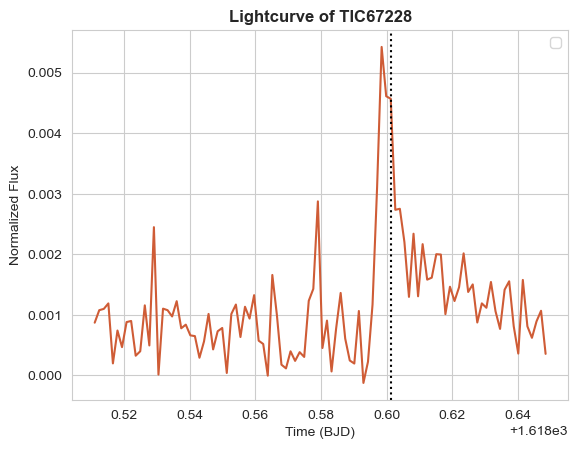

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


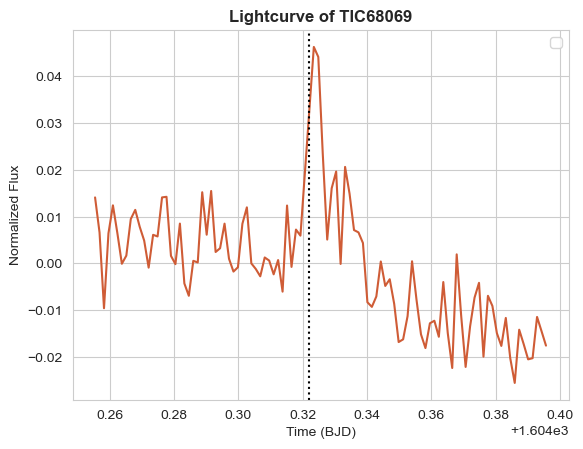

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


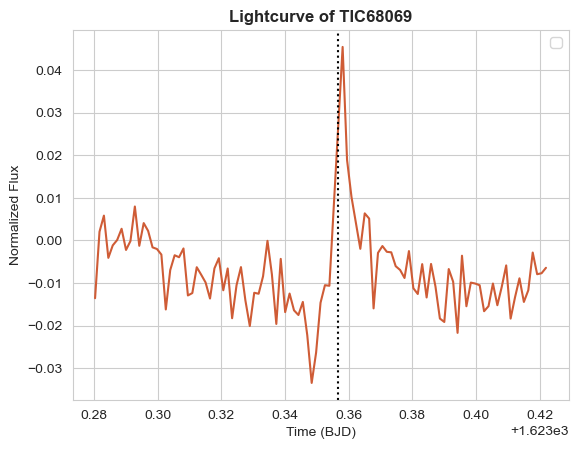

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


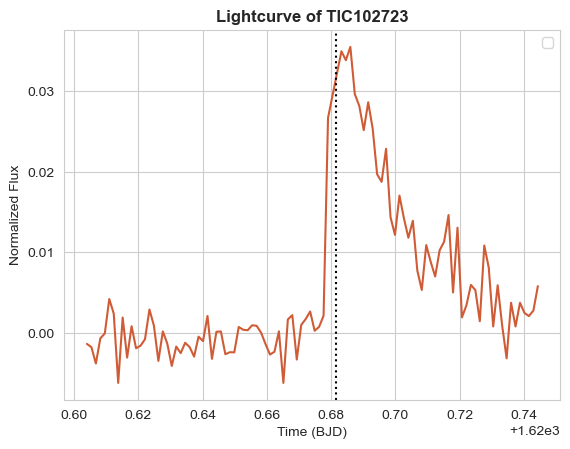

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


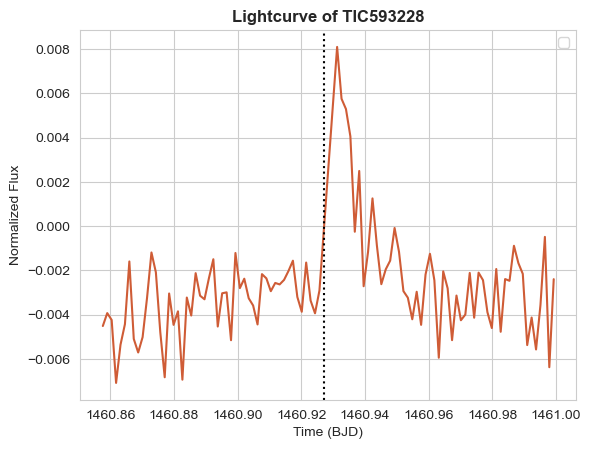

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


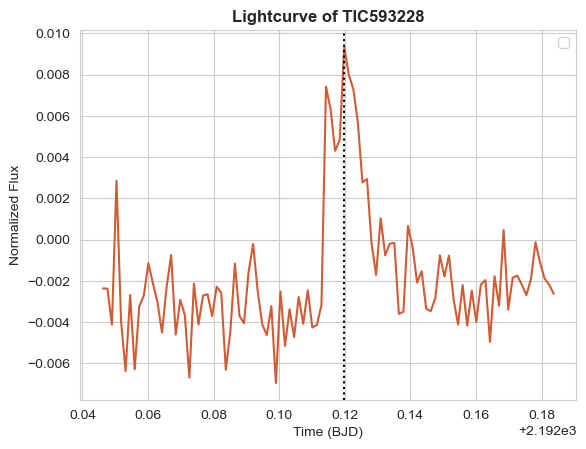

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


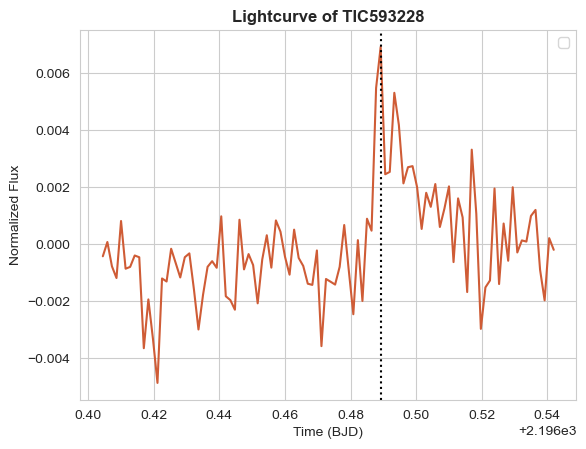

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-5.76e+01 ppm +/- 2.44e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-5.76e+01 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


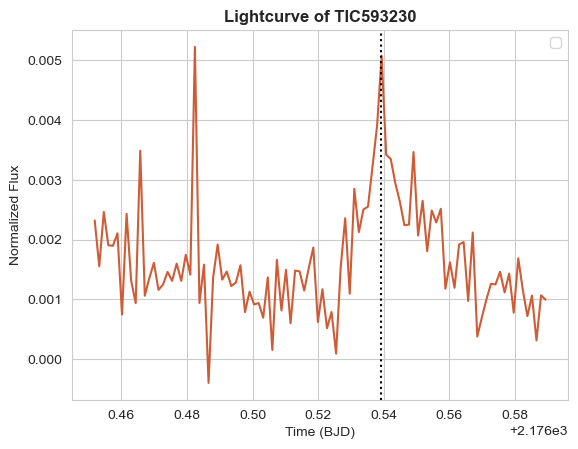

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-4.50e+02 ppm +/- 8.15e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-4.50e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to pu

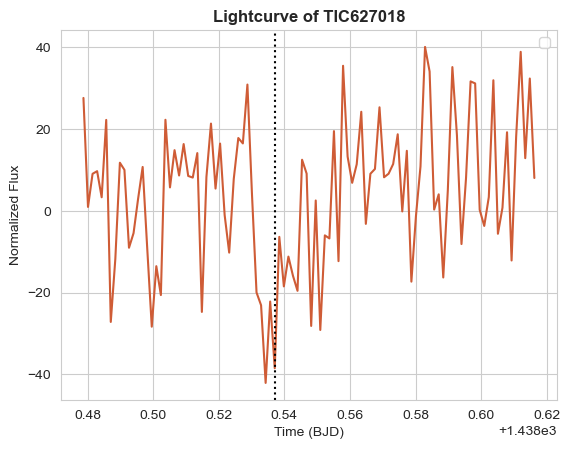

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-4.50e+02 ppm +/- 8.15e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-4.50e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to pu

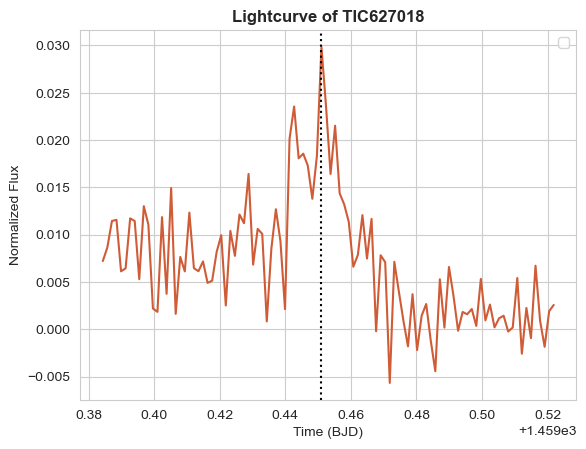

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


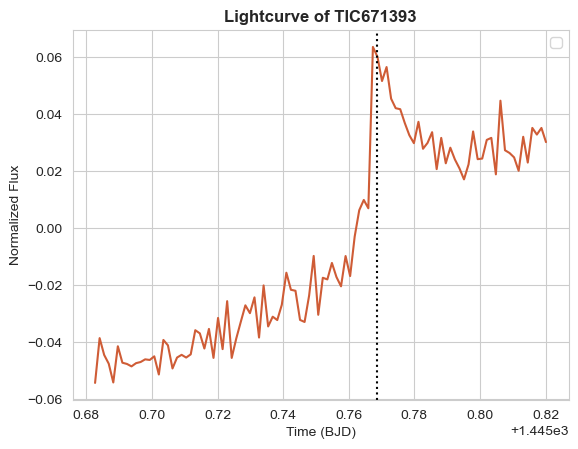

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


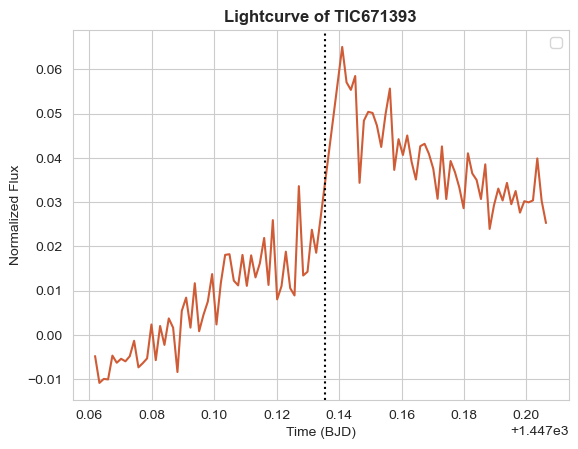

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


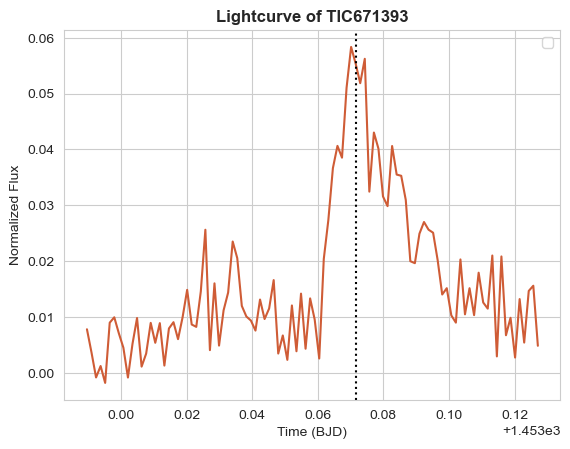

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


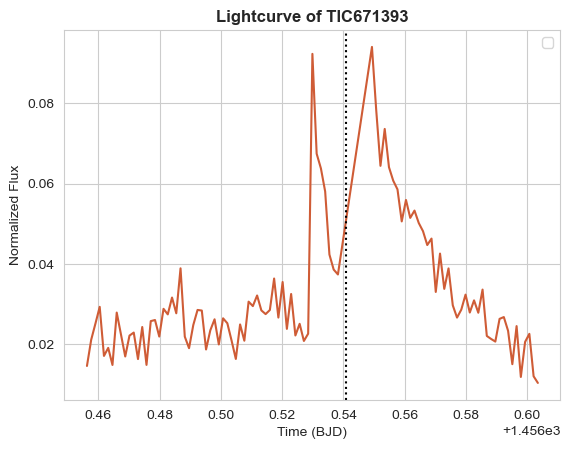

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


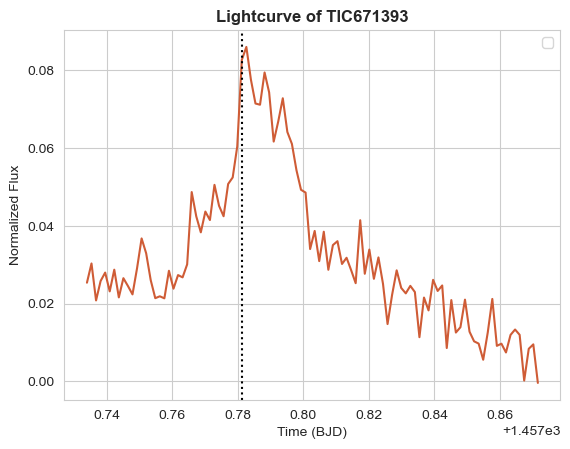

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


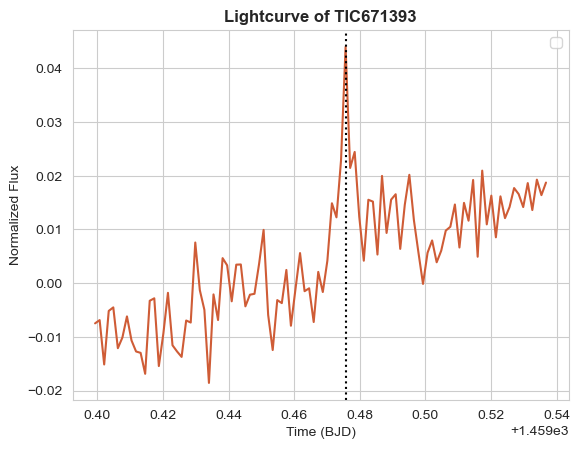

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=2.23e+02 ppm +/- 4.11e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


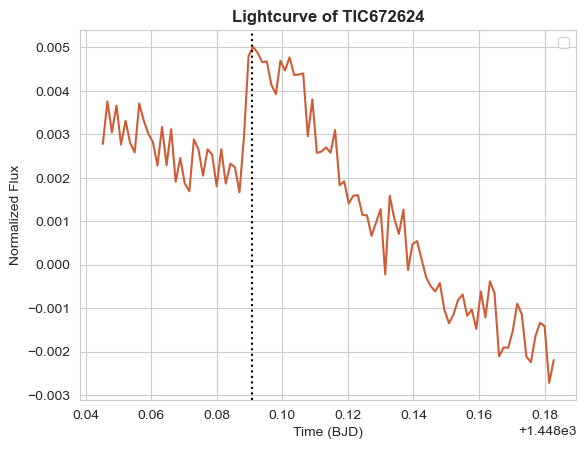

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=2.23e+02 ppm +/- 4.11e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


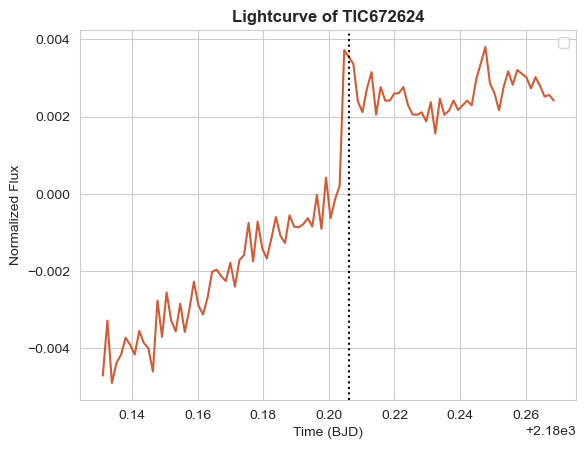

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-4.69e+01 ppm +/- 2.93e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-4.69e+01 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to pu

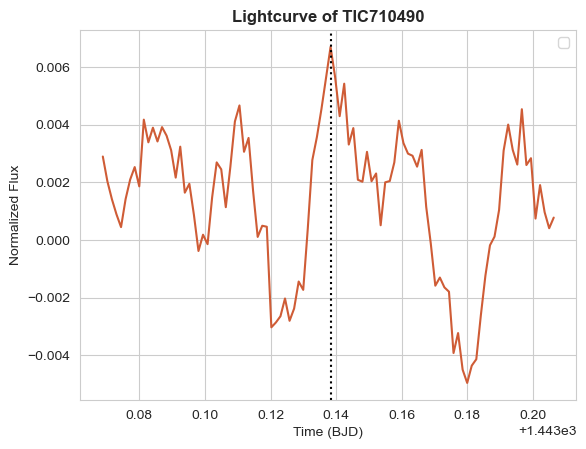

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-5.17e+02 ppm +/- 7.34e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-5.17e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


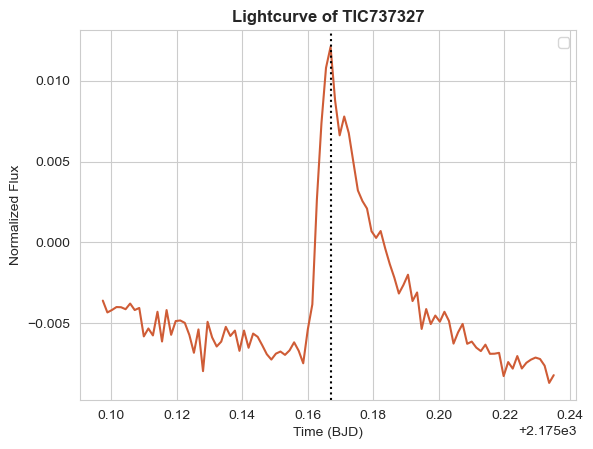

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


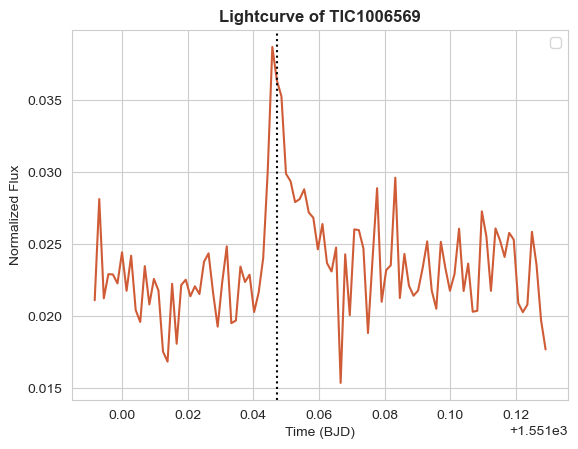

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


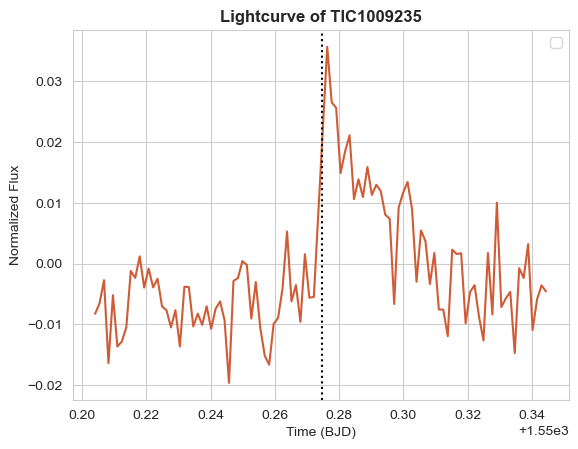

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=1.47e+00 ppm +/- 1.04e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


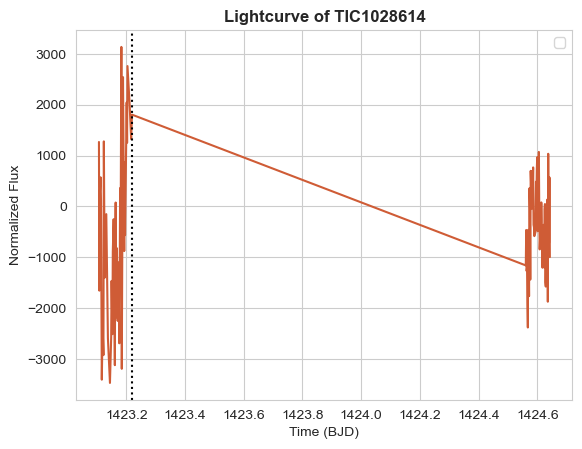

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=8.20e+01 ppm +/- 1.20e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


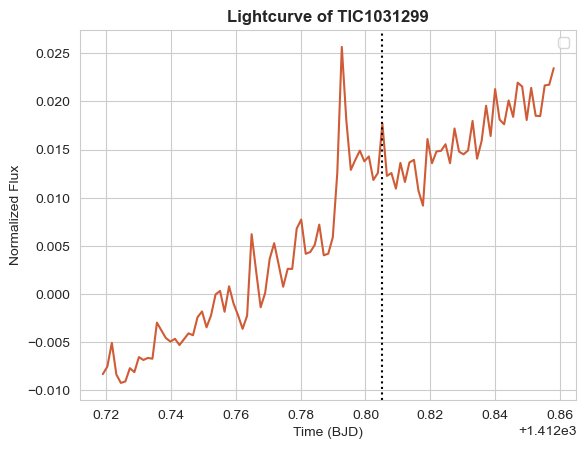

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=8.20e+01 ppm +/- 1.20e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


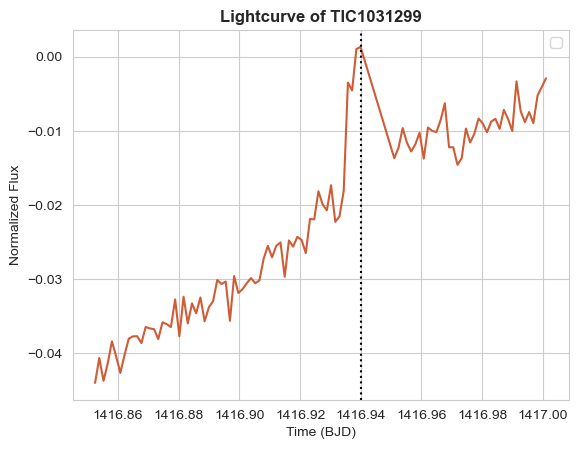

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=8.20e+01 ppm +/- 1.20e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


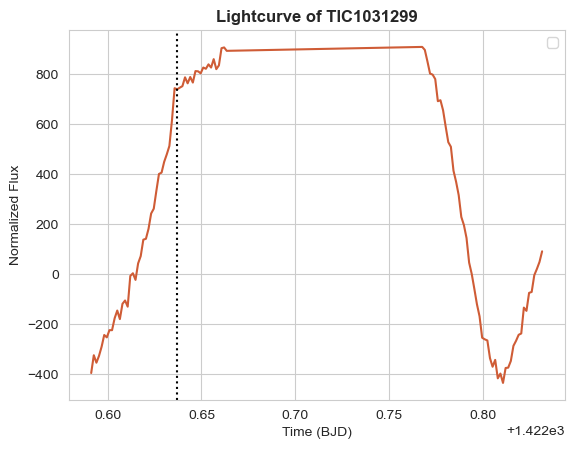

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=8.20e+01 ppm +/- 1.20e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


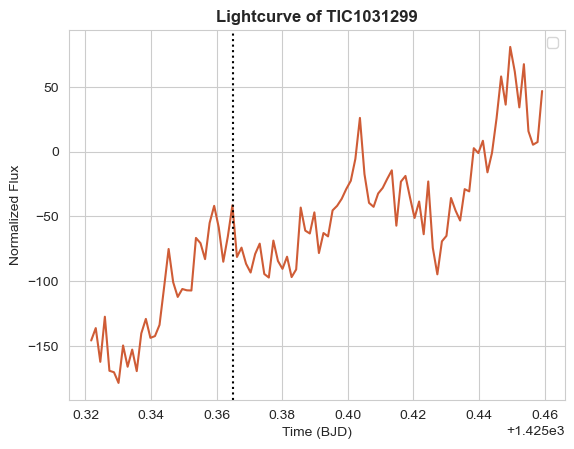

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=8.20e+01 ppm +/- 1.20e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


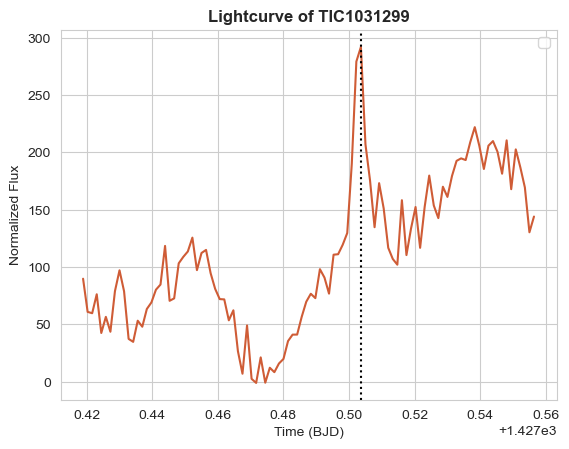

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=8.20e+01 ppm +/- 1.20e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


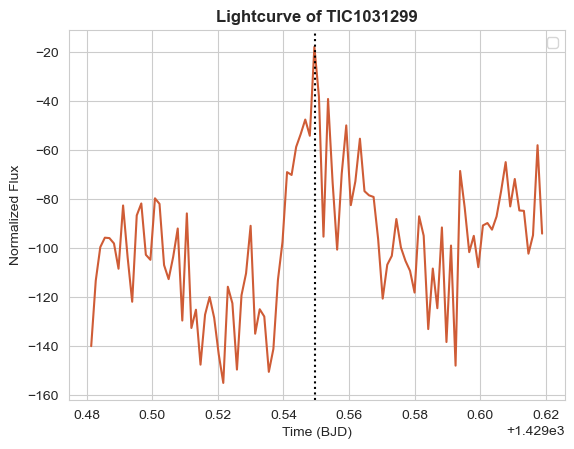

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=8.20e+01 ppm +/- 1.20e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


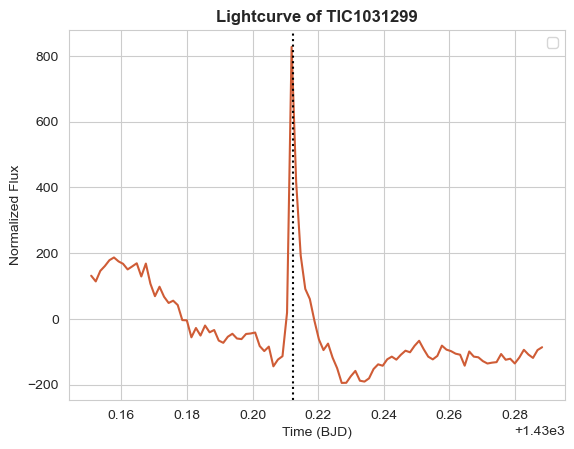

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=8.20e+01 ppm +/- 1.20e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


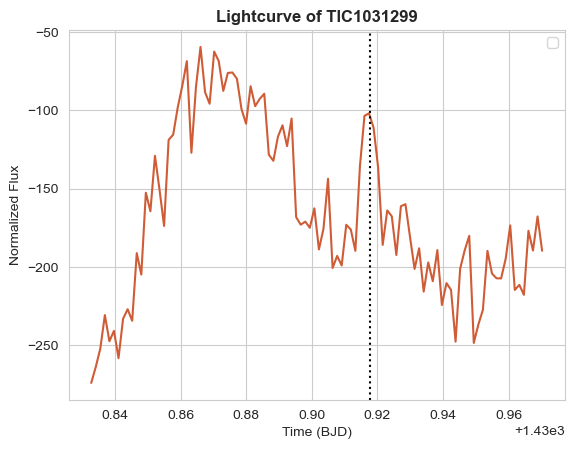

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=8.20e+01 ppm +/- 1.20e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


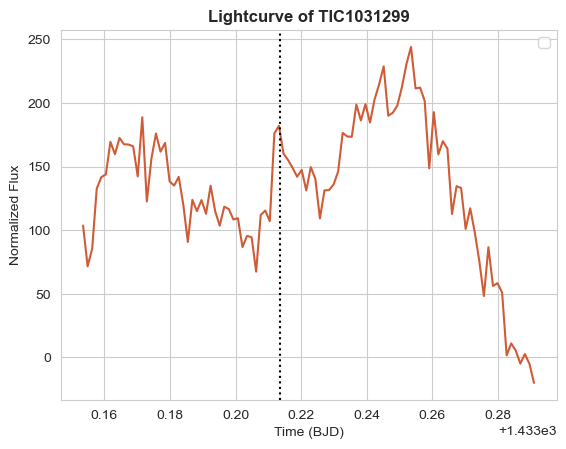

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=8.20e+01 ppm +/- 1.20e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


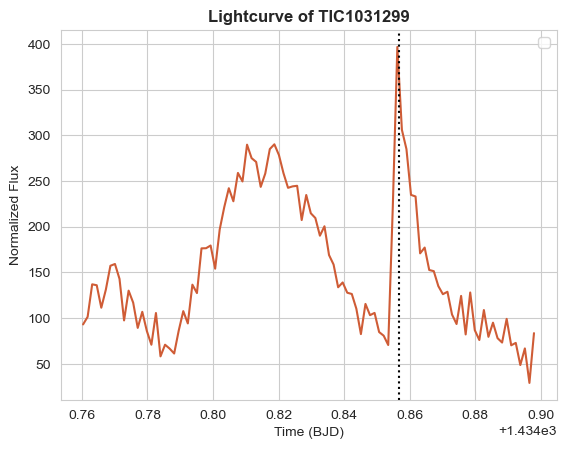

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


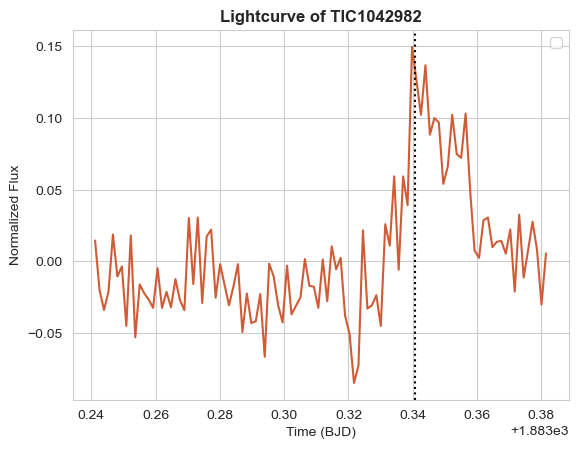

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


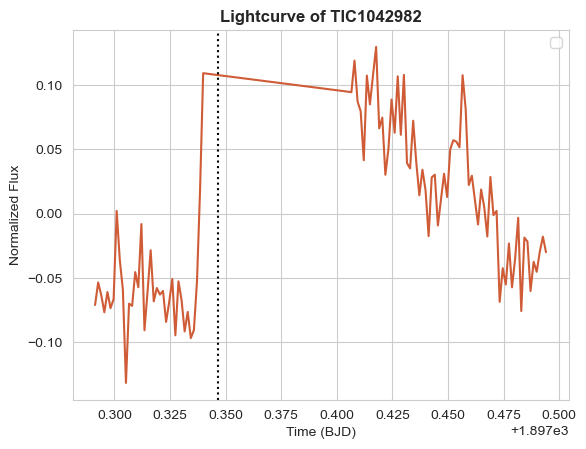

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=4.11e+00 ppm +/- 1.60e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


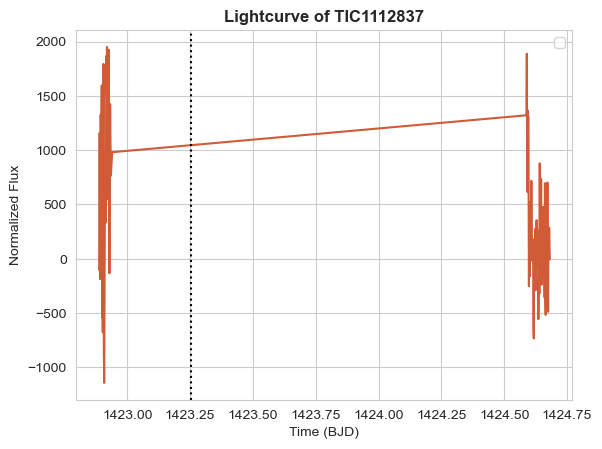

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=4.11e+00 ppm +/- 1.60e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


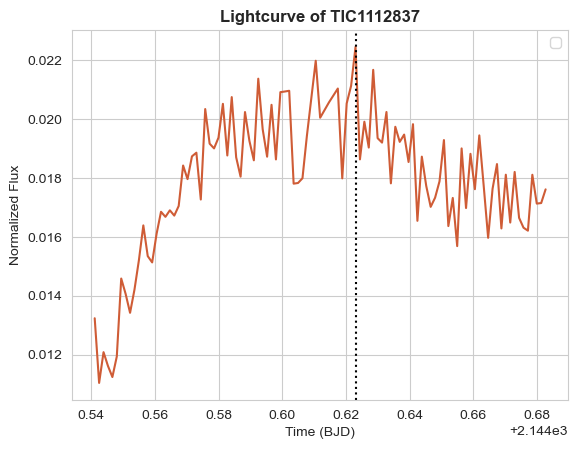

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=2.26e+02 ppm +/- 1.51e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


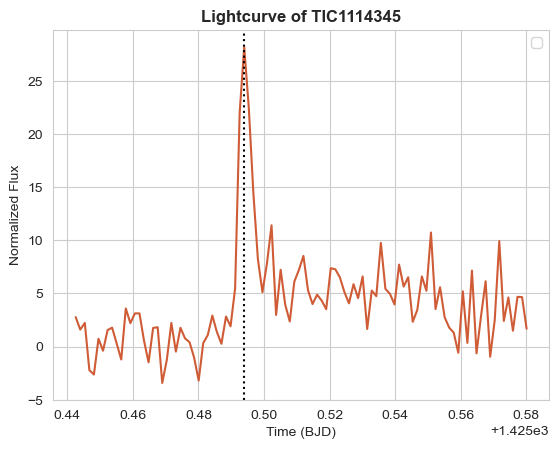

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=4.00e+01 ppm +/- 1.46e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


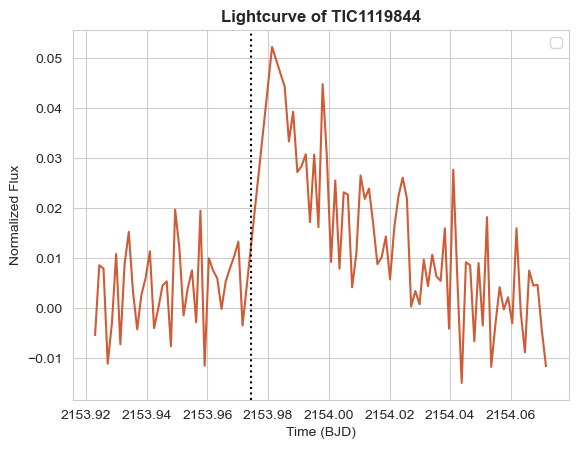

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


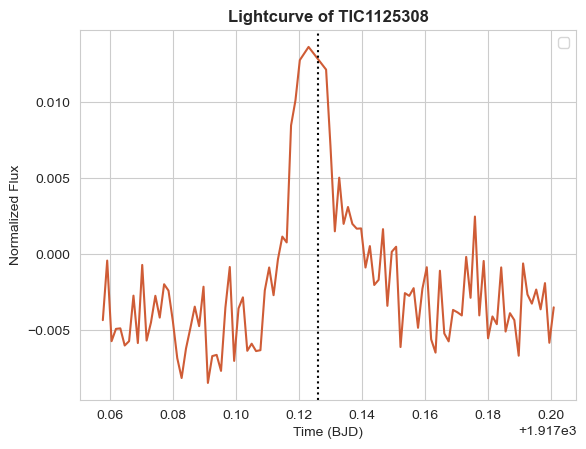

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-9.36e-01 ppm +/- 5.72e+02 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-9.36e-01 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


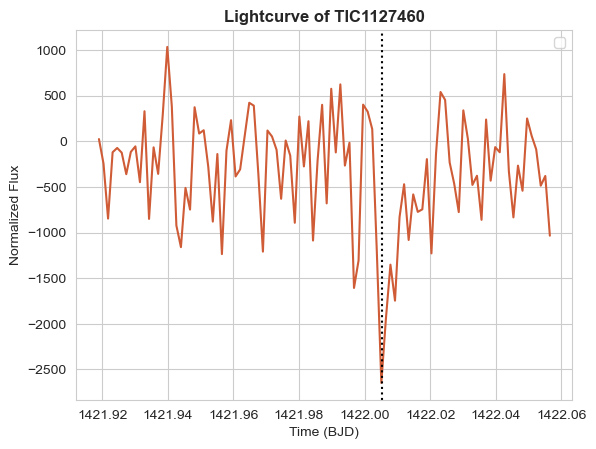

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-9.47e+00 ppm +/- 1.27e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-9.47e+00 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


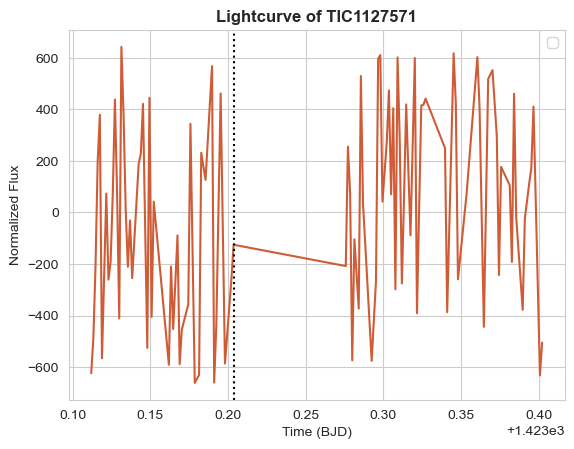

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-9.47e+00 ppm +/- 1.27e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-9.47e+00 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


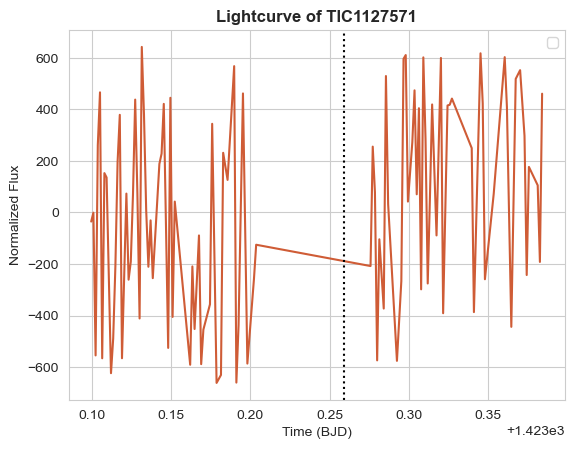

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


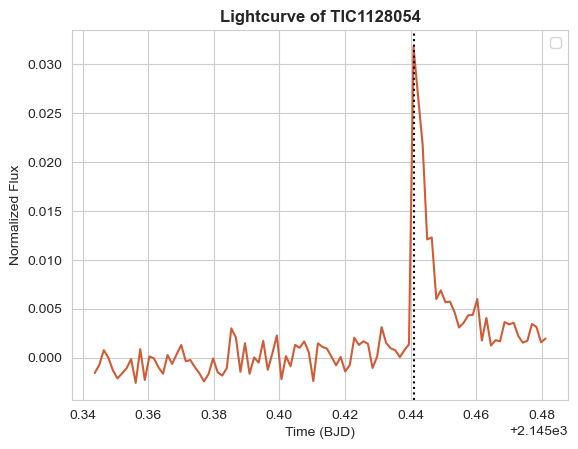

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=1.08e+03 ppm +/- 1.43e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


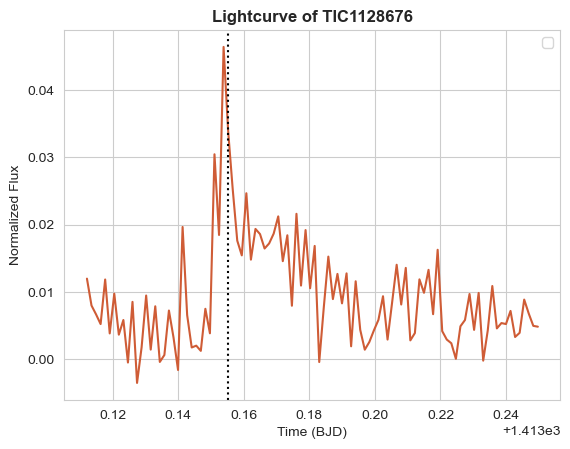

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-4.13e+00 ppm +/- 1.43e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-4.13e+00 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


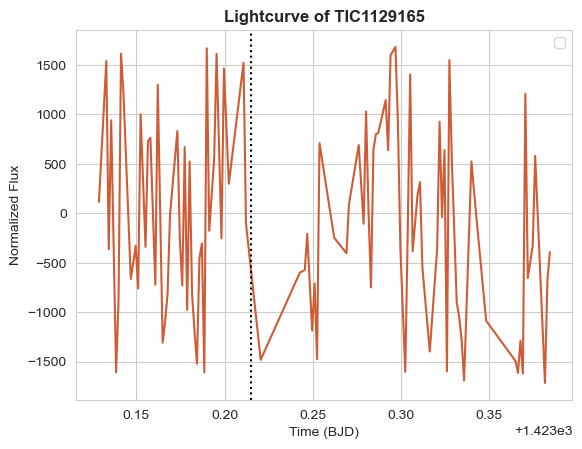

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=1.07e+02 ppm +/- 8.33e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


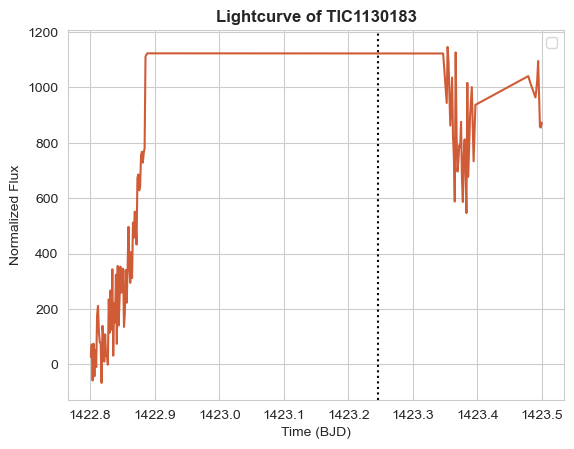

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-5.90e-02 ppm +/- 3.70e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-5.90e-02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


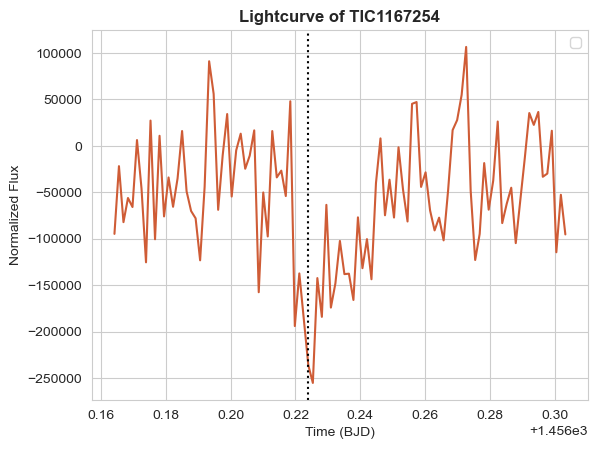

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


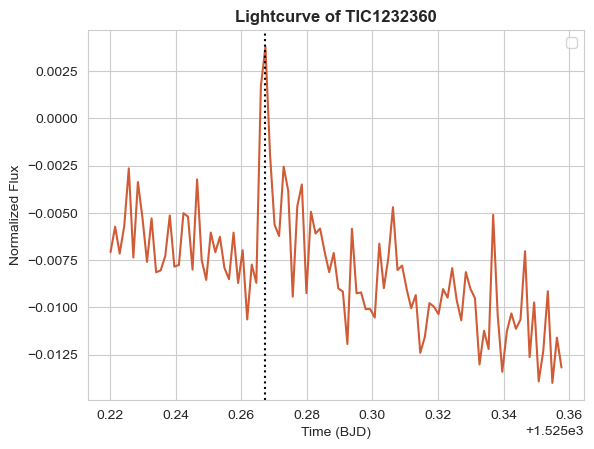

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


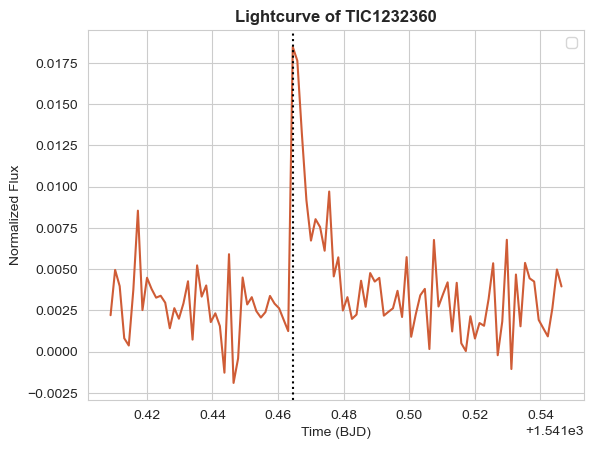

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=6.61e+00 ppm +/- 9.05e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


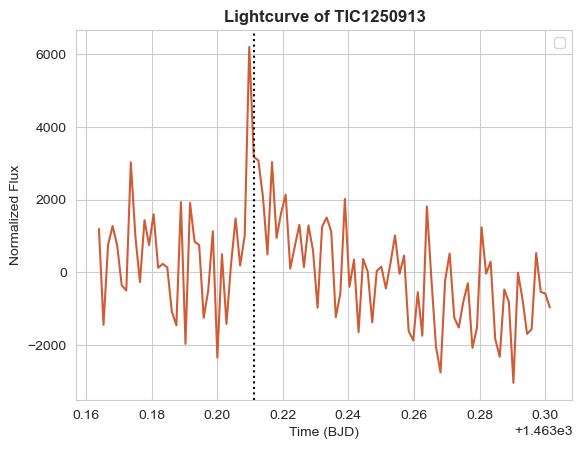

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=6.61e+00 ppm +/- 9.05e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


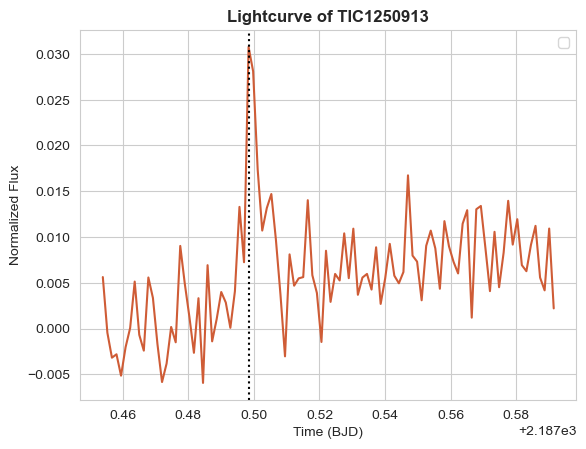

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=6.61e+00 ppm +/- 9.05e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


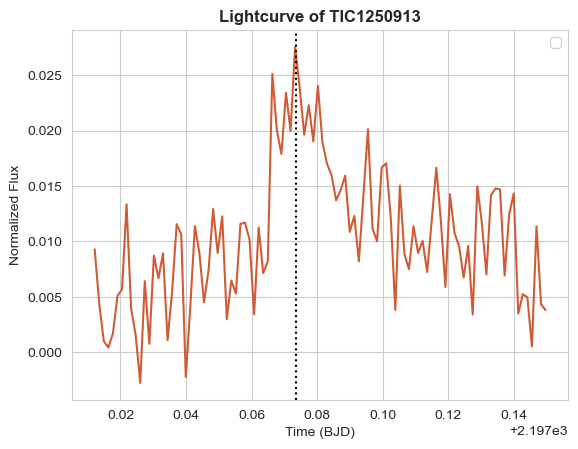

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=1.68e+02 ppm +/- 6.22e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


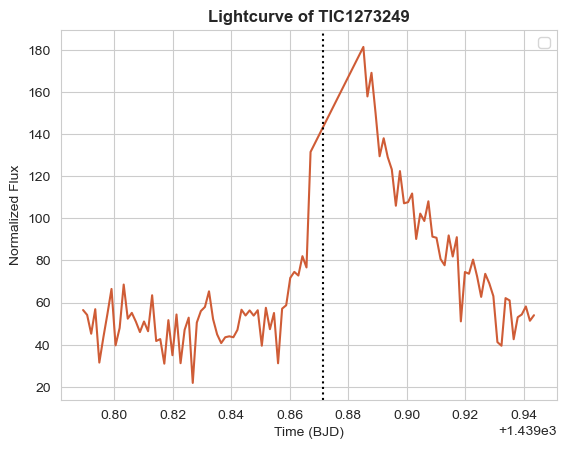

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=1.68e+02 ppm +/- 6.22e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


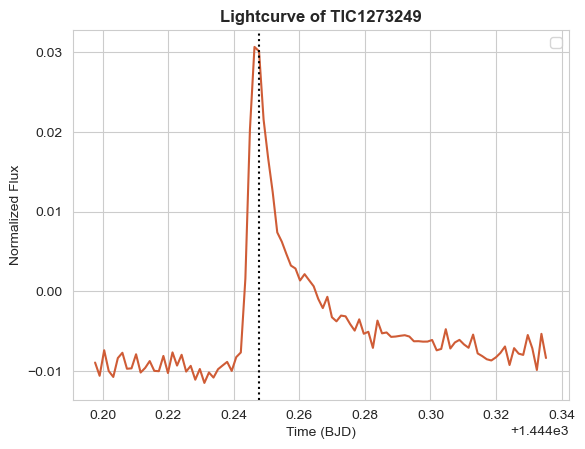

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=1.68e+02 ppm +/- 6.22e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


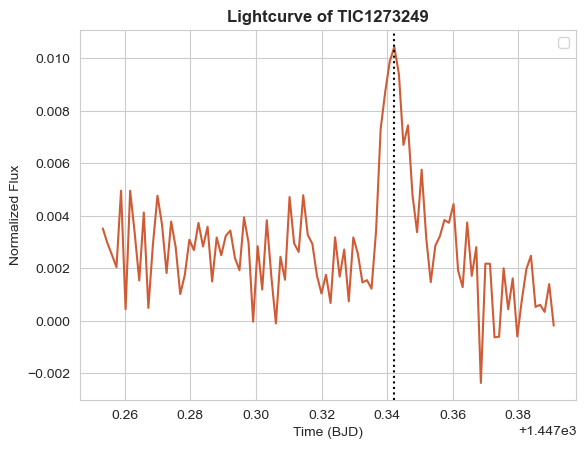

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=1.68e+02 ppm +/- 6.22e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


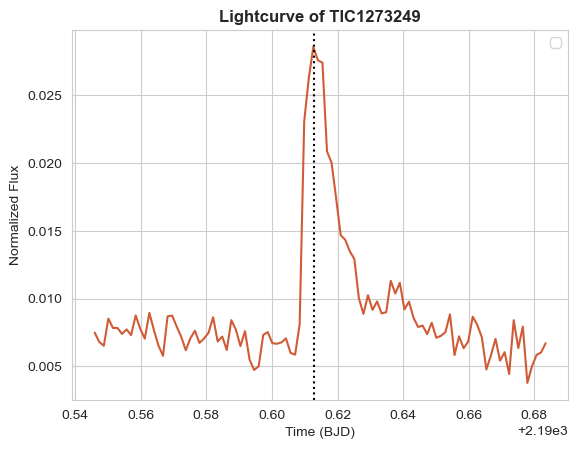

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-4.87e+02 ppm +/- 5.64e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-4.87e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


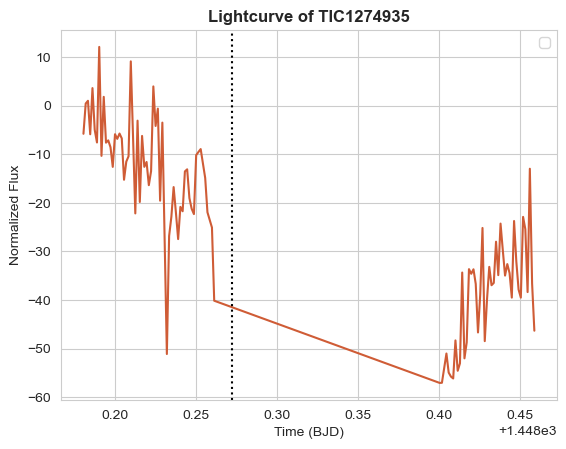

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-4.87e+02 ppm +/- 5.64e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-4.87e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


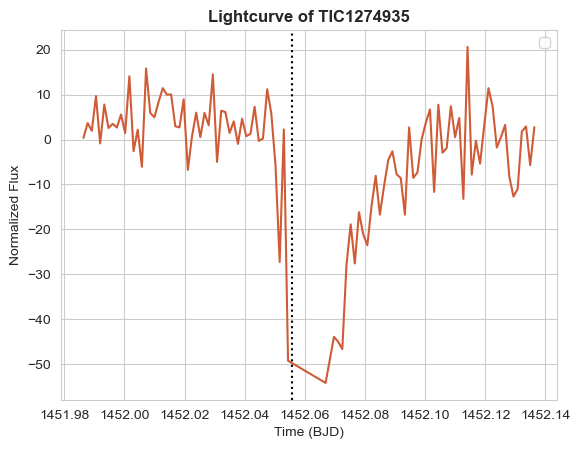

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-4.87e+02 ppm +/- 5.64e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-4.87e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


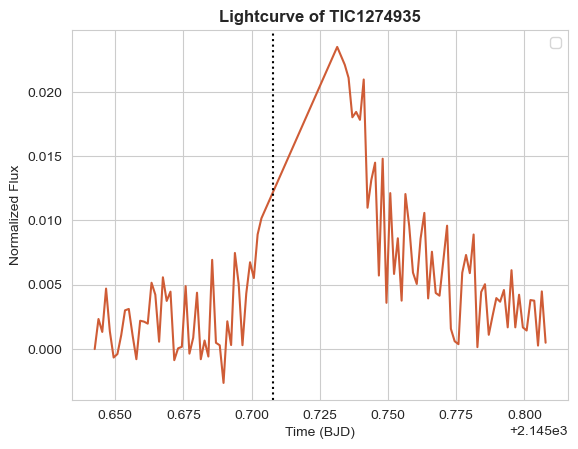

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-4.87e+02 ppm +/- 5.64e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-4.87e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


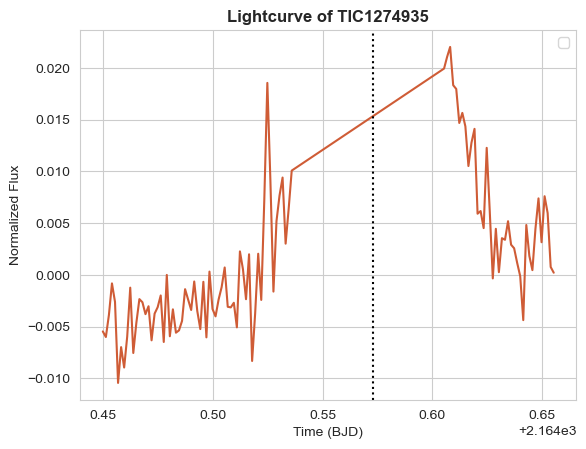

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-4.87e+02 ppm +/- 5.64e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-4.87e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


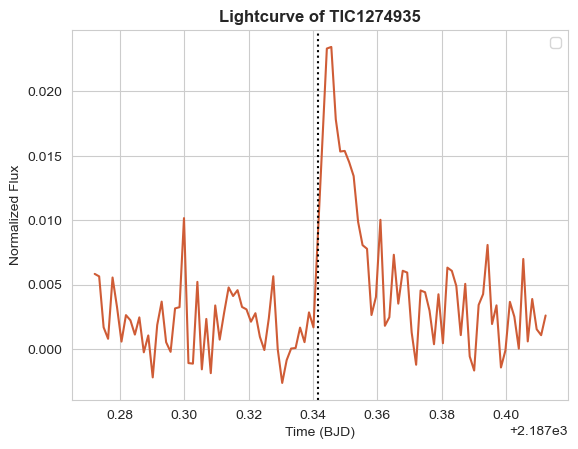

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-4.87e+02 ppm +/- 5.64e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-4.87e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


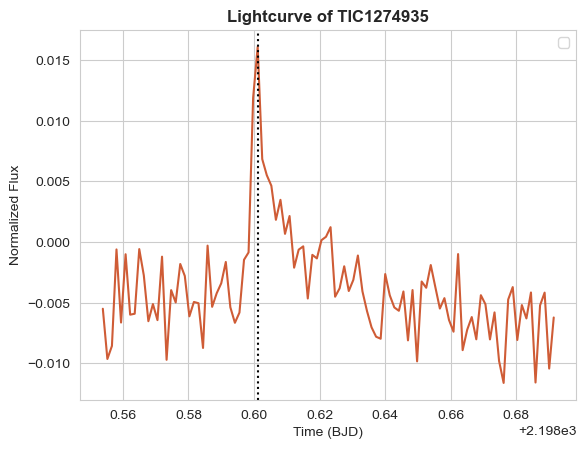

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


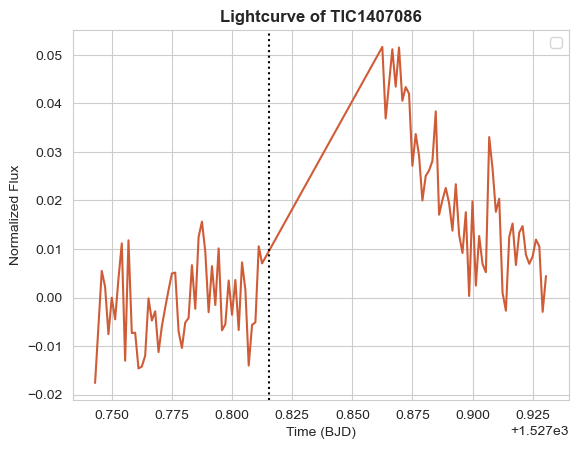

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=7.05e+02 ppm +/- 7.31e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


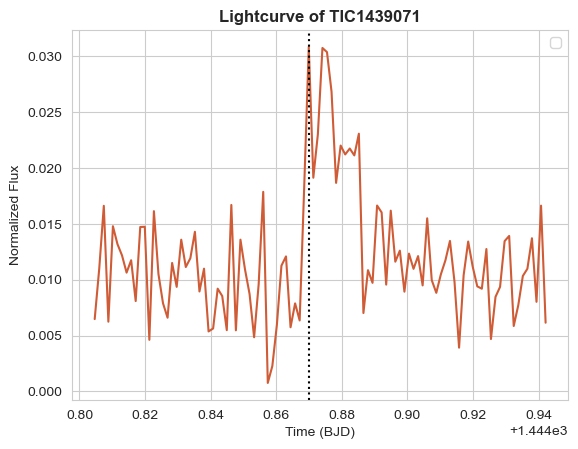

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=7.05e+02 ppm +/- 7.31e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


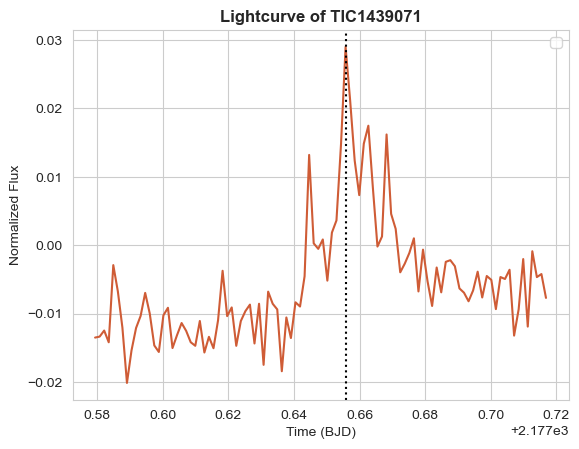

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-4.36e+01 ppm +/- 1.16e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-4.36e+01 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


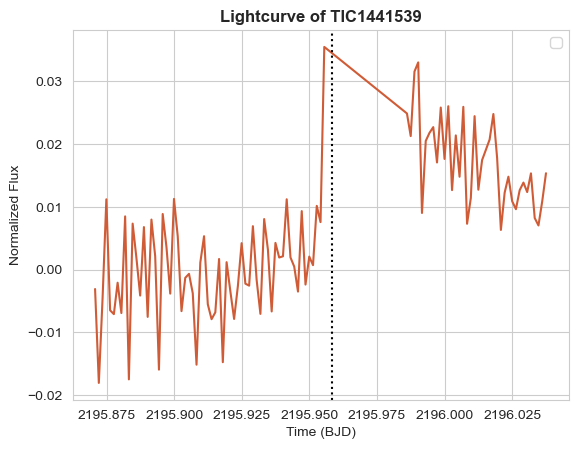

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


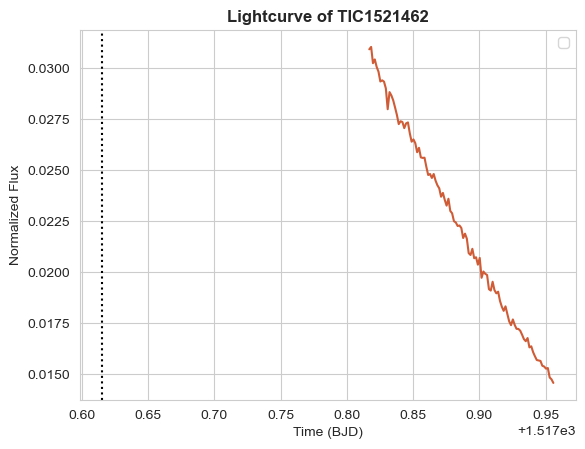

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


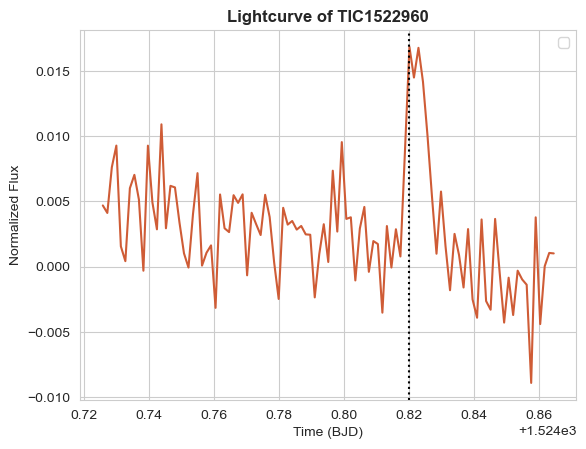

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


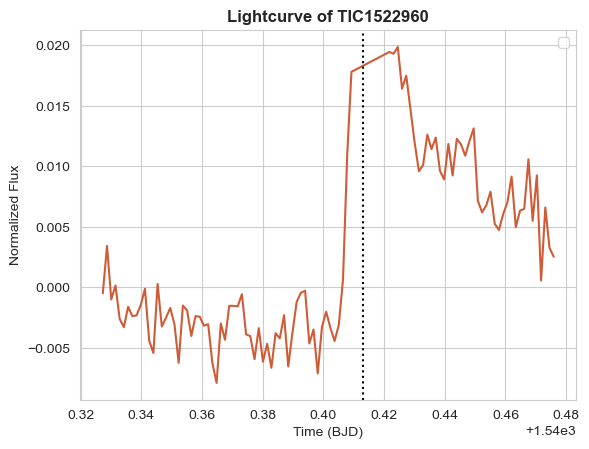

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


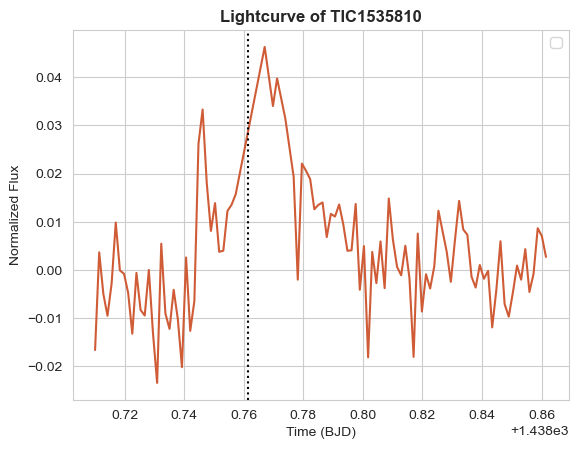

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


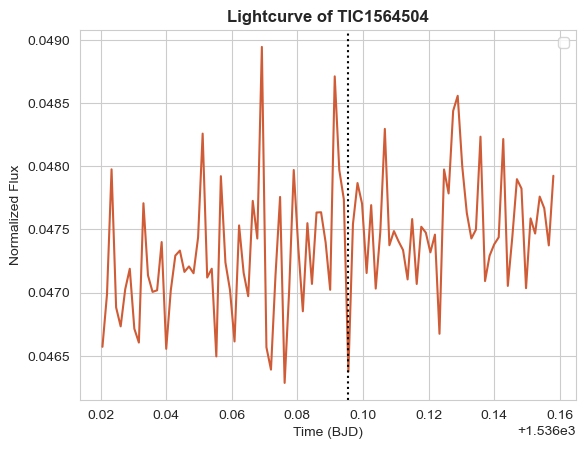

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


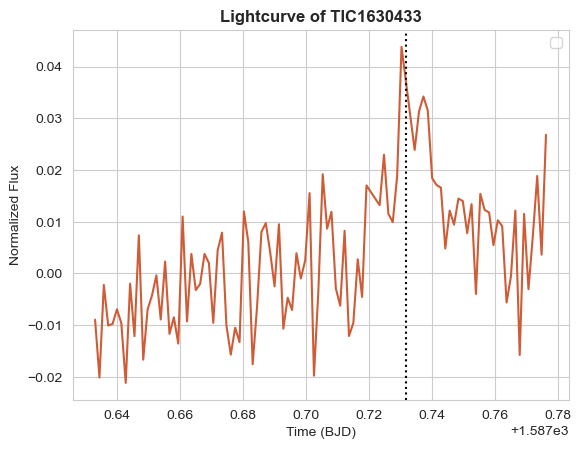

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


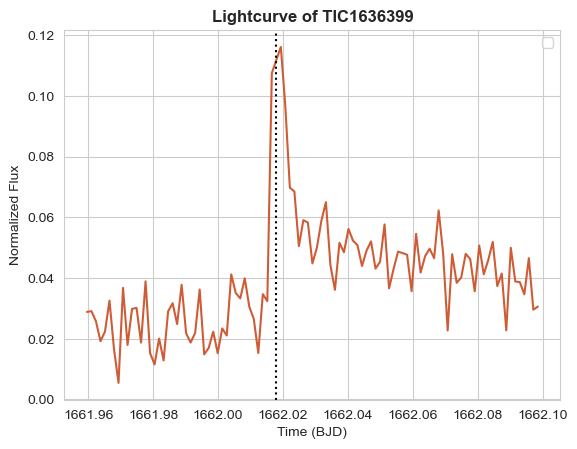

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


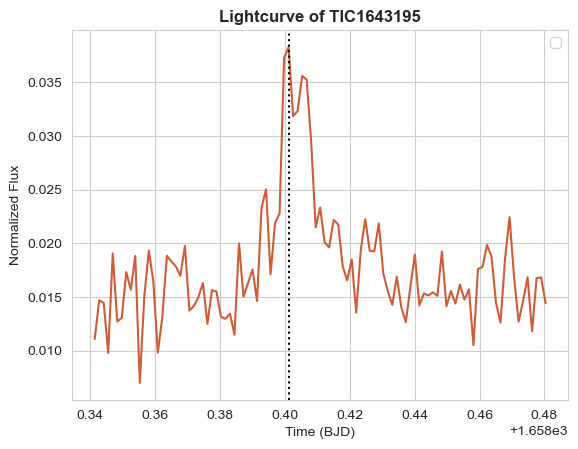

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


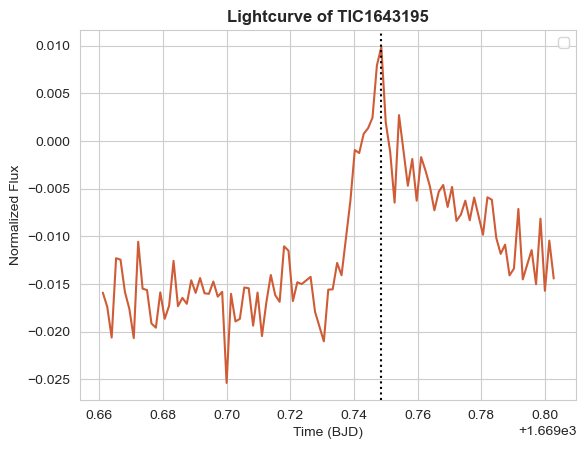

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


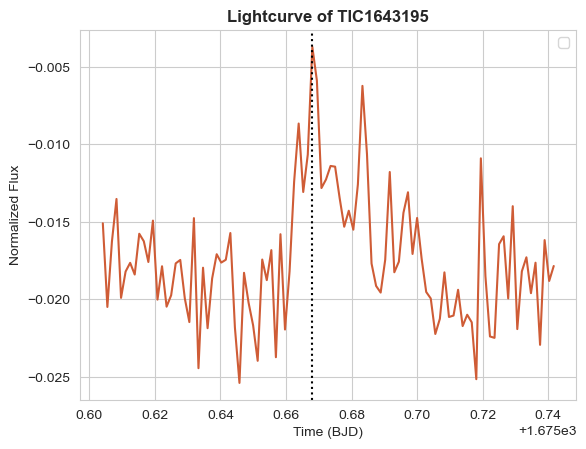

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


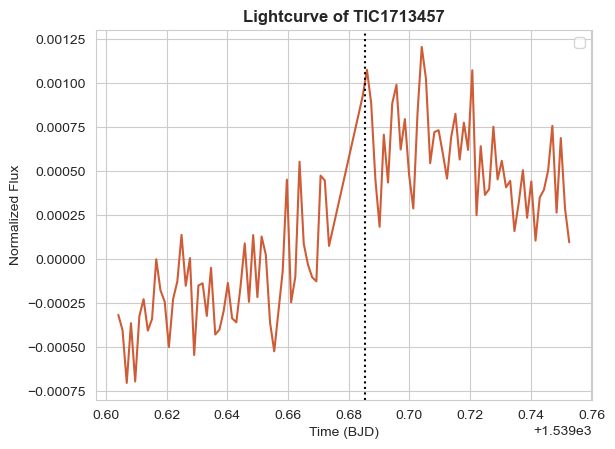

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


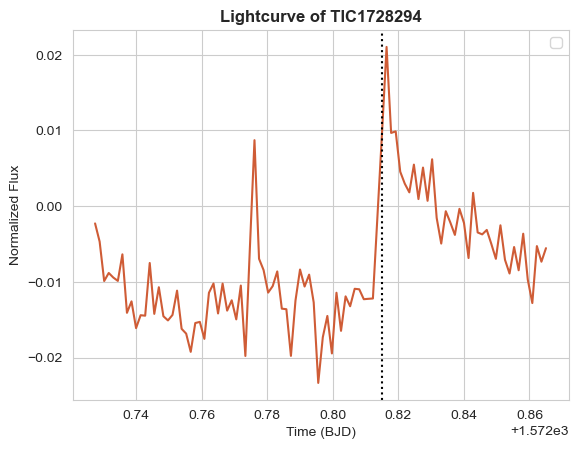

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


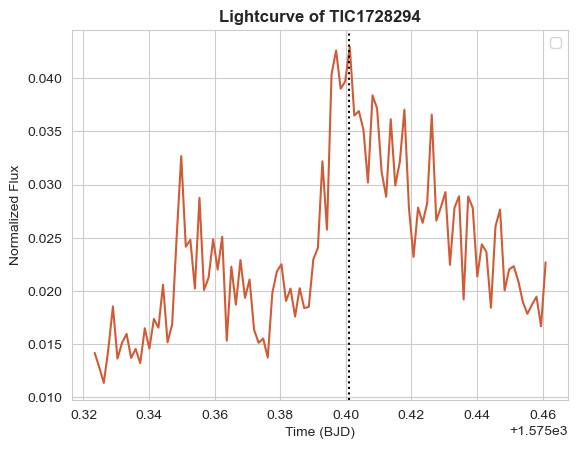

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


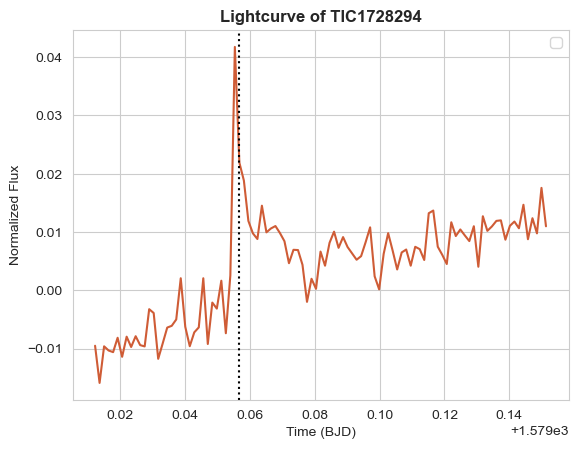

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


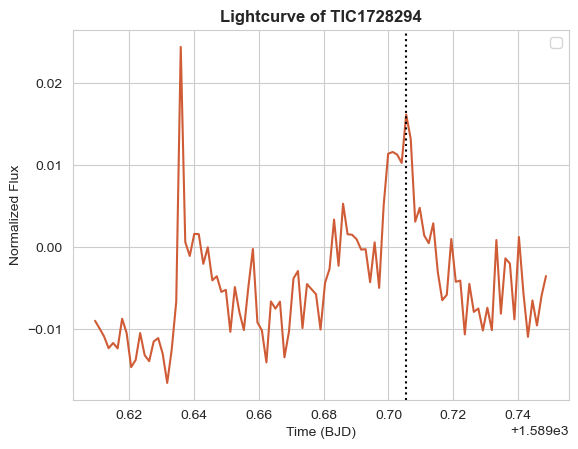

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


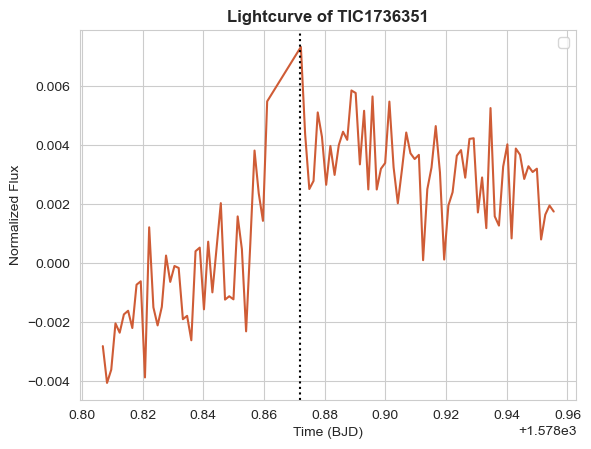

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


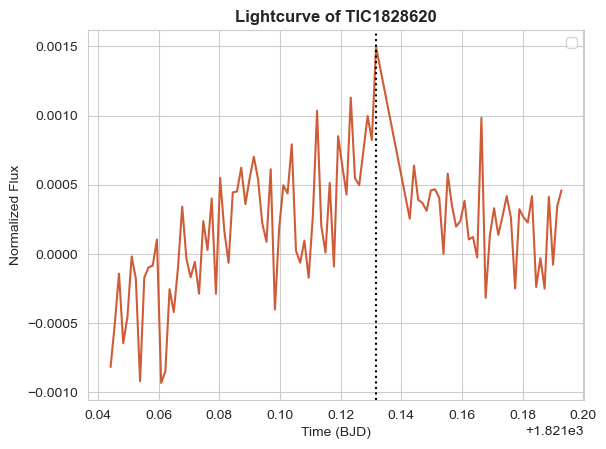

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


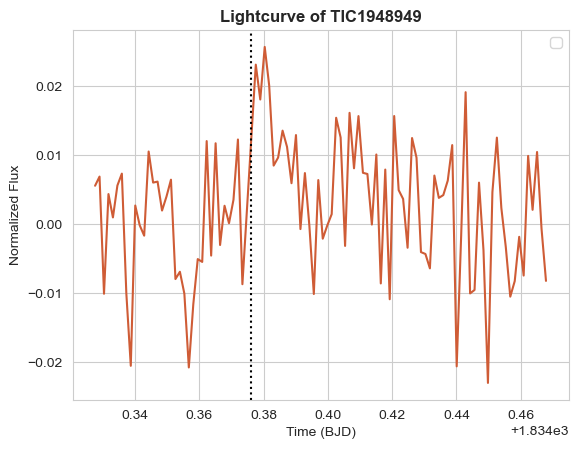

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


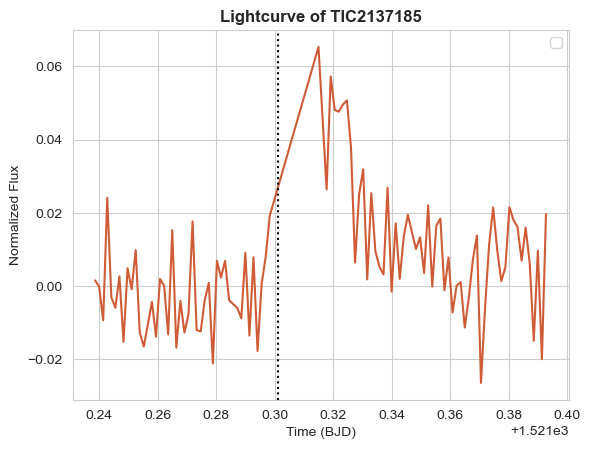

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/astropy/units/quantity.py:671: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


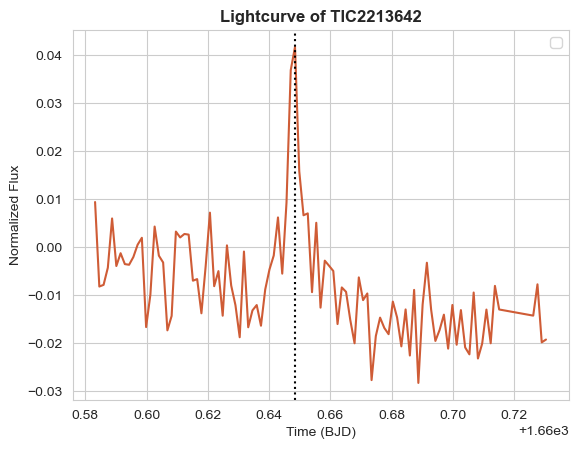

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


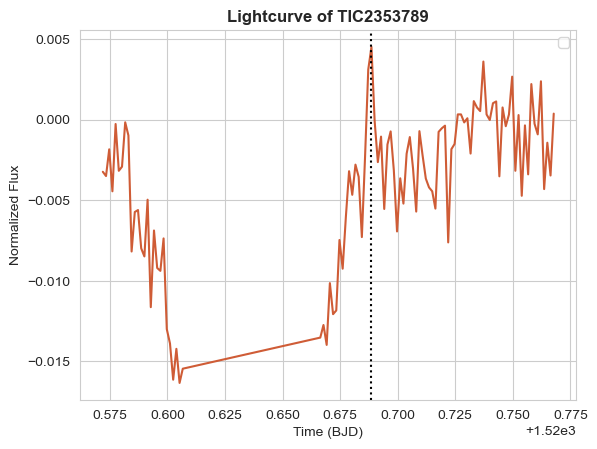

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


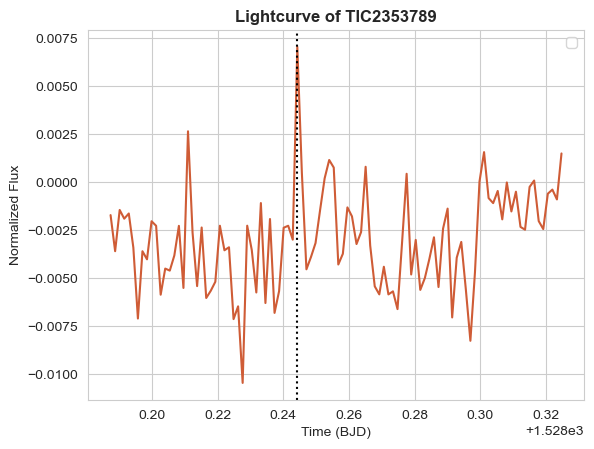

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


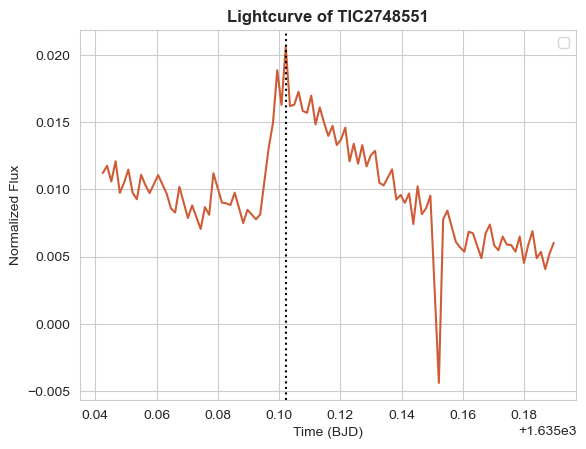

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-3.04e+01 ppm +/- 3.46e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-3.04e+01 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


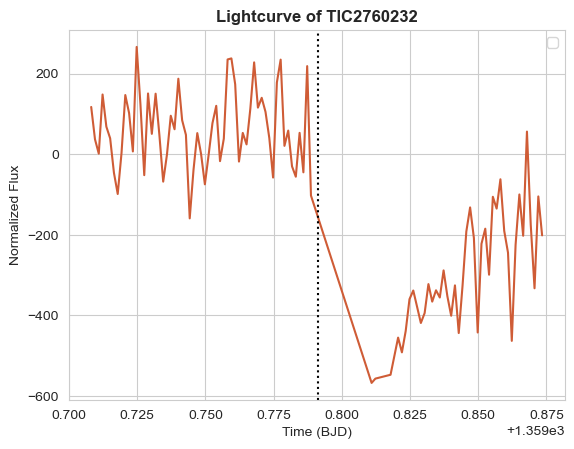

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-3.04e+01 ppm +/- 3.46e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-3.04e+01 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


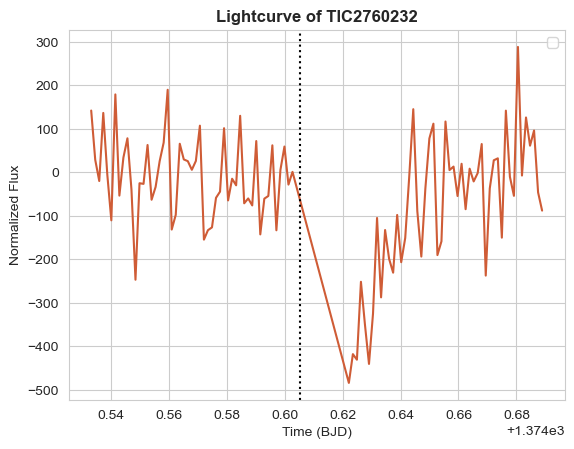

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-3.04e+01 ppm +/- 3.46e+03 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-3.04e+01 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


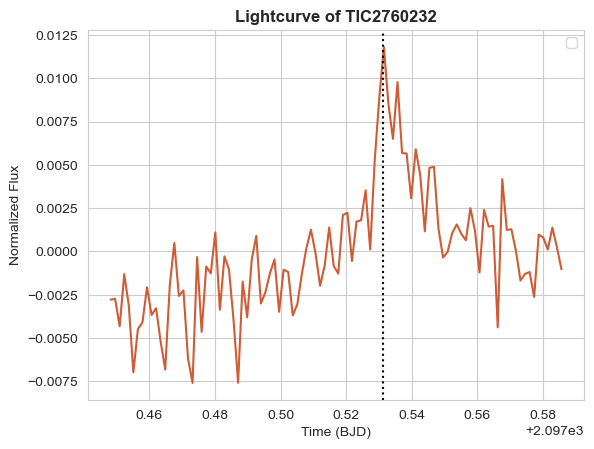

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-3.21e+02 ppm +/- 1.06e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-3.21e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


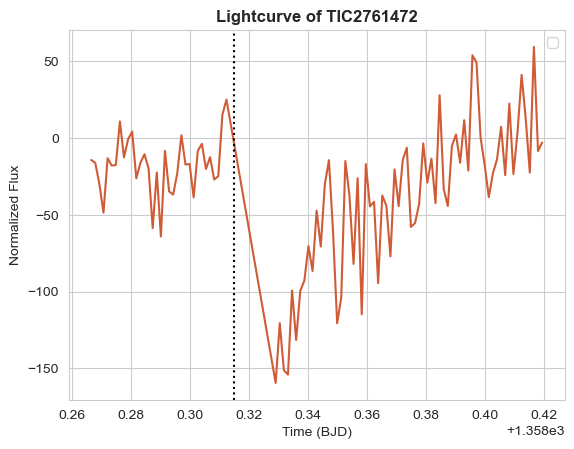

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-3.21e+02 ppm +/- 1.06e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-3.21e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


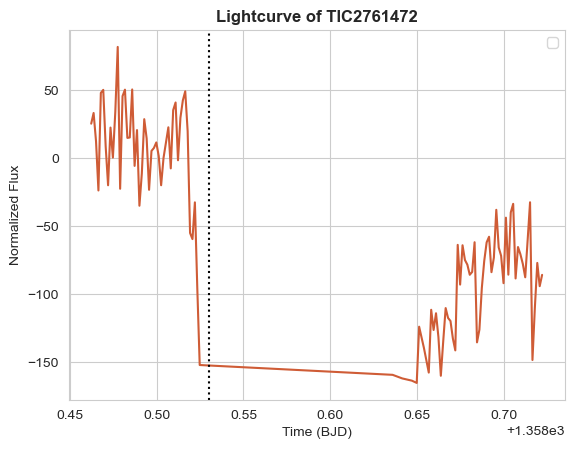

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-3.21e+02 ppm +/- 1.06e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-3.21e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


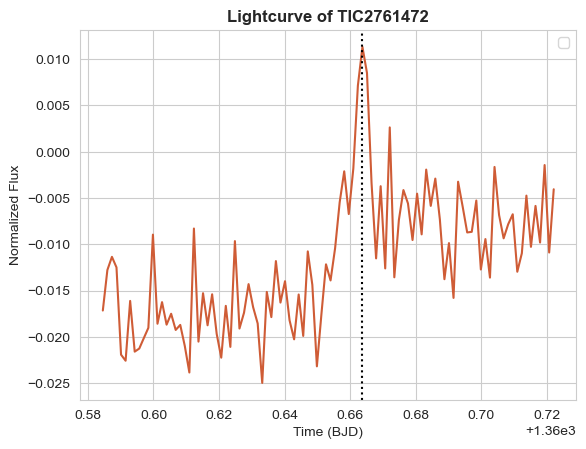

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-3.21e+02 ppm +/- 1.06e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-3.21e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


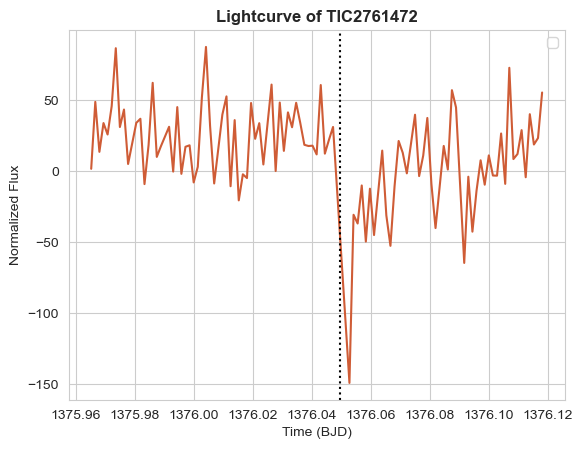

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-3.21e+02 ppm +/- 1.06e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-3.21e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


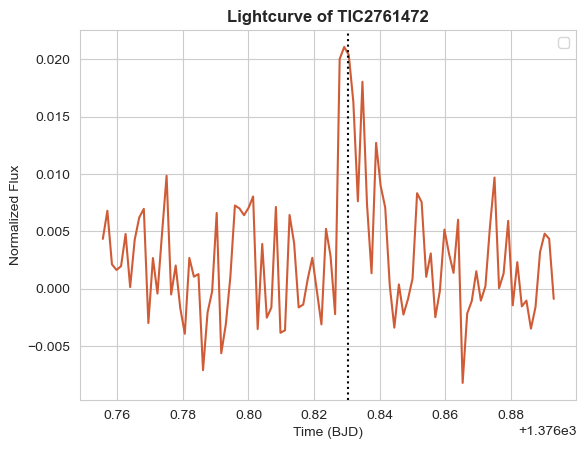

/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1129: LightkurveWarning: The light curve appears to be zero-centered (median=-3.21e+02 ppm +/- 1.06e+04 ppm); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  warnings.warn(
/Users/bella/anaconda3/envs/undergrad_ENV/lib/python3.12/site-packages/lightkurve/lightcurve.py:1140: LightkurveWarning: The light curve has a negative median flux (-3.21e+02 ppm); `normalize()` will therefore divide by a negative number and invert the light curve, which is probablynot what you want
  warnings.warn(
/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


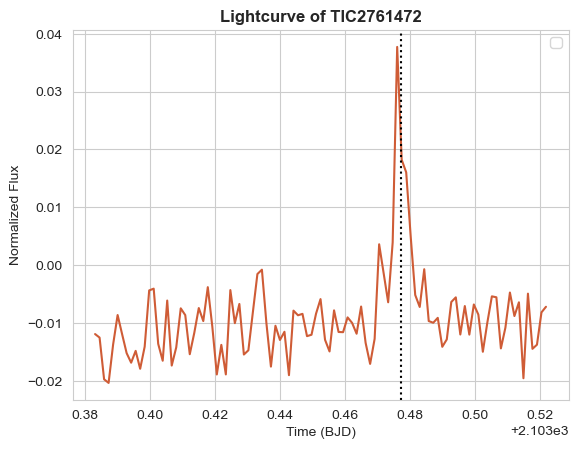

/var/folders/pq/xr8rr6kj661dlbhfxj5vw0z00000gn/T/ipykernel_61191/1236586524.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


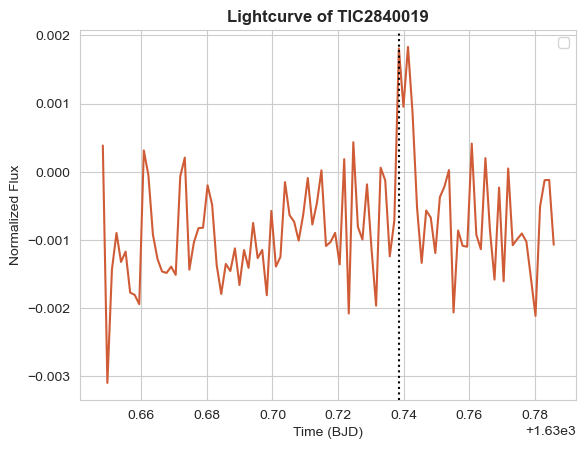

In [9]:
window_size = 100

for _, row in flare_df[:100].iterrows():
    name = f'TIC{row['TIC']}'
    lightcurve_data = LightcurveData(name, 120)

    delta_x = lightcurve_data.time[1] - lightcurve_data.time[0]

    flare_time = row['Flare peak time (BJD)']
    peak_idx = np.argmin(np.abs(lightcurve_data.time - flare_time))

    offset = np.random.randint(-20, 20)
    start_idx = max(0, peak_idx - window_size//2 + offset)
    end_idx = min(len(lightcurve_data.time), start_idx + window_size)

    time = np.array(lightcurve_data.time[start_idx:end_idx])
    flux = np.array(lightcurve_data.flux[start_idx:end_idx])

    sns.set_style("whitegrid")
    plt.plot(time, flux, color = '#CF5C36')
    plt.axvline(x = row['Flare peak time (BJD)'], color = 'black', ls = 'dotted')
    plt.title(f'Lightcurve of TIC{row['TIC']}', fontweight = 'bold')
    plt.xlabel('Time (BJD)')
    plt.ylabel('Normalized Flux')
    plt.legend()
    plt.show()